## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Download the dataset

In [3]:
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv'
df = pd.read_csv(url)
# work with only 2021 and earlier data as the challenge rules suggest
df = df[df.JAHR<2022]
# convert MONAT from object to datetime type to visualize properly
df['MONAT_DATETIME'] = pd.to_datetime(df[df.MONAT != 'Summe'].MONAT,format='%Y%m')

In [4]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
12,Alkoholunfälle,insgesamt,2021,Summe,383.0,430.0,NaN,-10.93,NaN
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


## Visualize historically the number of accidents per category

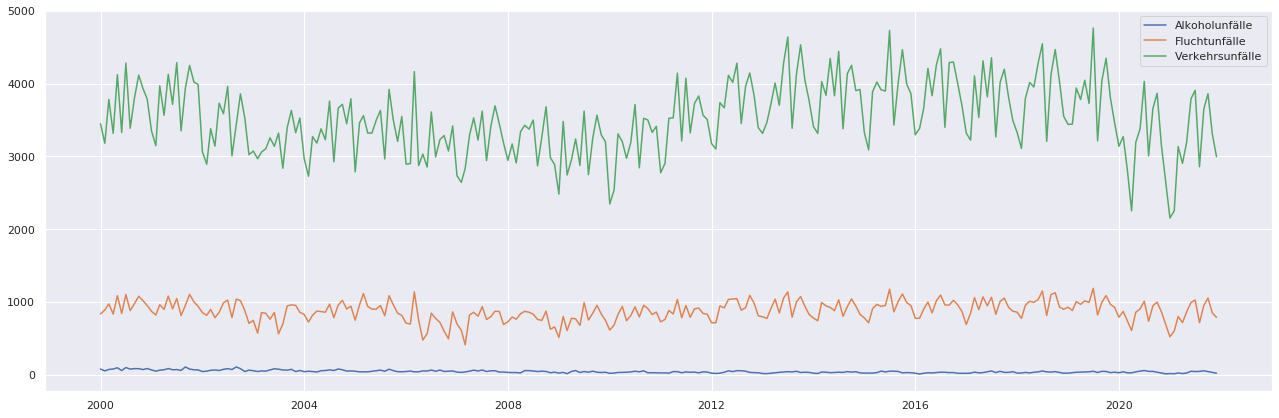

In [11]:
plt.figure(figsize=(22,7))
plt.plot('MONAT_DATETIME','WERT',data=df[(df.MONAT!='Summe')&(df.AUSPRAEGUNG=='insgesamt')&(df['MONATSZAHL']=='Alkoholunfälle')].sort_values(by='MONAT_DATETIME'), label='Alkoholunfälle')
plt.plot('MONAT_DATETIME','WERT',data=df[(df.MONAT!='Summe')&(df.AUSPRAEGUNG=='insgesamt')&(df['MONATSZAHL']=='Fluchtunfälle')].sort_values(by='MONAT_DATETIME'), label='Fluchtunfälle')
plt.plot('MONAT_DATETIME','WERT',data=df[(df.MONAT!='Summe')&(df.AUSPRAEGUNG=='insgesamt')&(df['MONATSZAHL']=='Verkehrsunfälle')].sort_values(by='MONAT_DATETIME'), label='Verkehrsunfälle')
plt.legend(loc='best')
plt.show()

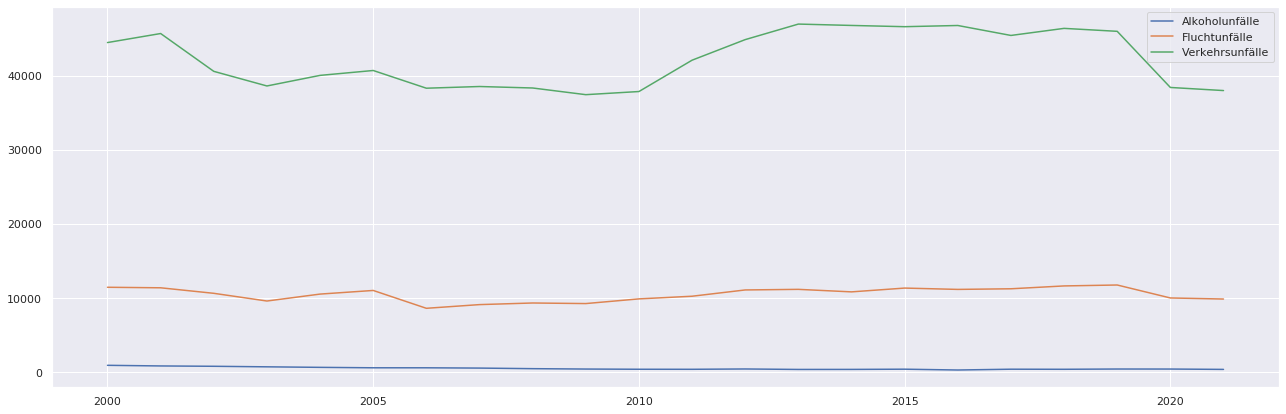

In [10]:
plt.figure(figsize=(22,7))
plt.plot('JAHR','WERT',data=df[(df.MONAT=='Summe')&(df.AUSPRAEGUNG=='insgesamt')&(df['MONATSZAHL']=='Alkoholunfälle')].sort_values(by='JAHR'), label='Alkoholunfälle')
plt.plot('JAHR','WERT',data=df[(df.MONAT=='Summe')&(df.AUSPRAEGUNG=='insgesamt')&(df['MONATSZAHL']=='Fluchtunfälle')].sort_values(by='JAHR'), label='Fluchtunfälle')
plt.plot('JAHR','WERT',data=df[(df.MONAT=='Summe')&(df.AUSPRAEGUNG=='insgesamt')&(df['MONATSZAHL']=='Verkehrsunfälle')].sort_values(by='JAHR'), label='Verkehrsunfälle')
plt.legend(loc='best')
plt.show()

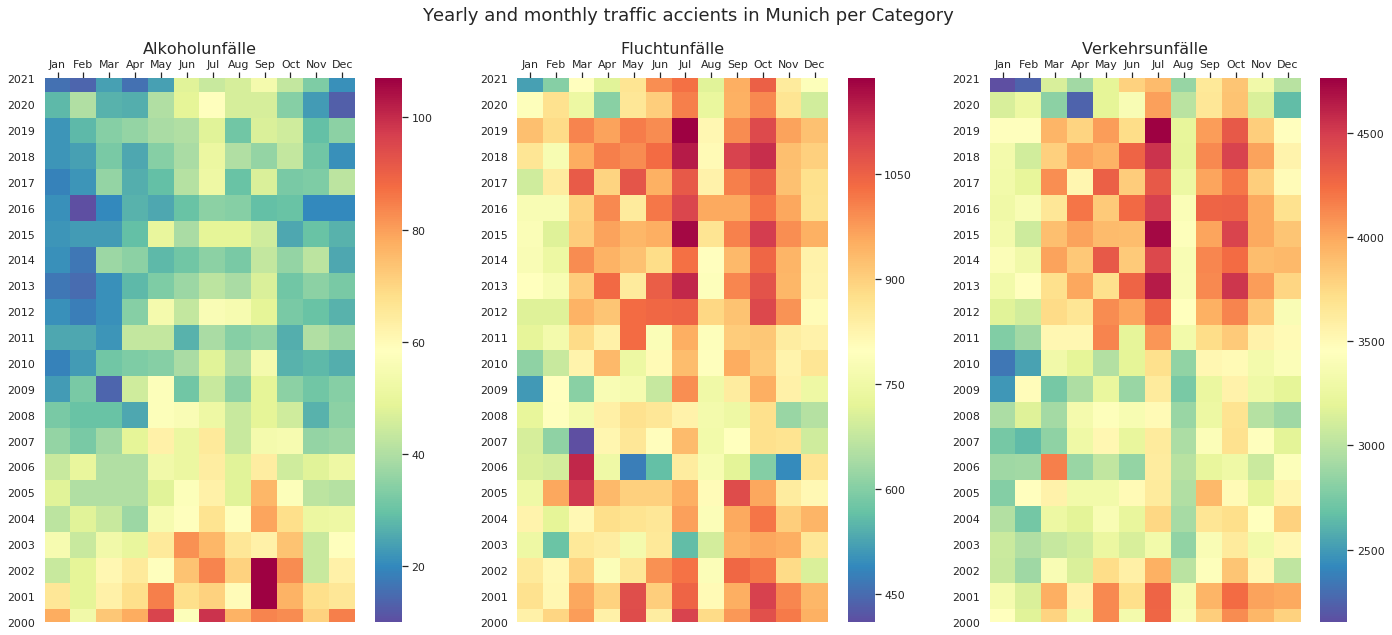

In [13]:
# Visualize a monthly dependence as a heatmap
fig, axs = plt.subplots(1, 3, figsize=(24,10))
fig.suptitle('Yearly and monthly traffic accients in Munich per Category', fontsize=18)
# plot three categories in a subplot loop as the plotting functions are the same
for idx, category in enumerate(df.MONATSZAHL.unique()):
    data_for_heatmap = df[(df['MONATSZAHL']==category)&(df.AUSPRAEGUNG=='insgesamt')&(df.MONAT!='Summe')].sort_values(by='MONAT_DATETIME')[['JAHR','WERT','MONAT_DATETIME']]
    matrix = data_for_heatmap['WERT'].values.reshape(len(data_for_heatmap.JAHR.unique()),-1)
    month_names=data_for_heatmap['MONAT_DATETIME'].dt.month_name().str[:3].unique().tolist()
    years=data_for_heatmap['MONAT_DATETIME'].dt.year.unique().tolist()
    sns.heatmap(ax=axs[idx], data=matrix, cmap='Spectral_r', square=True, xticklabels=month_names, yticklabels=years)
    axs[idx].xaxis.tick_top()
    axs[idx].invert_yaxis()
    axs[idx].set_title(category, fontsize=16)